## Feature Scaling and Manipulation
Scaling data is the process of increasing or decreasing the magnitude according to a fixed ratio. You change the size but not the shape of the data.

### Why do we need to use feature scaling?

It is not always mandatory to use feature scaling but often it is a good practice. It helps handling disparities in units.

In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely.

### How do we perform feature scaling?

There different types of feature scaling which are :

- Centring
- Standardization
- Normalization


## Centering
The primary benefit of centering your predictor data in linear modeling is so the **intercept represents the estimate of the target when all predictors are at their mean value**.

This basically means that when x=0 , the predictor value will be equal to the intercept and that can sometime not used for the best interpretation. The will get clearer from the below example in python.

### Example:

We are going to use the baseball data set, where the y value will be the height and x value will be the height, now let's try fitting a linear model to this data.

In [1]:
# Importing tools and the data



In [2]:
# Defining X, y, and setting up the regression in statsmodels



Lets try interpreting this , the constant coefficient (intercept) is -154.  Does that mean that when a baseball player has height in 0 inches their weight will be -154 lbs?  Does this sound right? To eliminate this misinterpretation we use centring.

Now lets see how that works: below is the equation which describes centering:

$X_c = X - \bar{X}$

In [3]:
# Centering heights



In [4]:
# Re-fitting with the centered heights



In [5]:
# Checking our mean of centered heights



In [6]:
# Seaborn regplot of weight vs. height



In [7]:
# Seaborn regplot of weight vs. height_centered



## Standardization

The most common method of scaling is standardization.  In this method we center the data, then we divide by the standard devation to enforce that the standard deviation of the variable is one:

$X_{std} = \cfrac{X-\bar{X}}{s_X}$


In [41]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

baseball_std = ss.fit_transform(baseball[['height_in', 'weight_lb']].values)
print("Type: {}".format(type(baseball_std)))
print("Mean: {}".format(baseball_std.mean()))
print("St. Dev: {}".format(baseball_std.std()))

Type: <class 'numpy.ndarray'>
Mean: 7.659678231909995e-16
St. Dev: 0.9999999999999998


In [8]:
# Re-fitting the model after standardization




In [9]:
# Seaborn regplot one more time



### Another Example:

In [59]:
# reminder: X[0] is height, X[1] is weight
X = baseball_std
X = sm.add_constant(X)
y = baseball.age.values

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     32.69
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.71e-14
Time:                        14:06:01   Log-Likelihood:                -2942.8
No. Observations:                1032   AIC:                             5892.
Df Residuals:                    1029   BIC:                             5906.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7342      0.131    219.997      0.000      28.478      28.990
x1            -0.9529      0.154     -6.179      0.000      -1.255      -0.650
x2             1.1880      0.154      7.703      0.000       0.885       1.491
==============================================================================
Omnibus:                      107.987   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.836
Skew:                           0.822   Prob(JB):                     3.54e-32
Kurtosis:                       3.816   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets interpret this:

- 1 standard deviation increase in height estimates -.95 years of age
- 1 standard deviation increase in weight estimates 1.18 years of age

Makes it easier to compare different quantity measurements with each other.



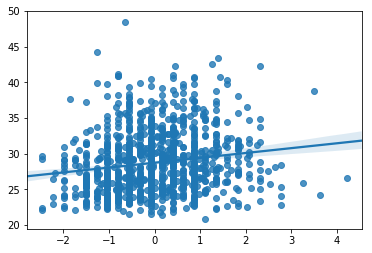

In [63]:
sns.regplot(X[:,2], y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = baseball[['age', 'height_in', 'weight_lb']]

mms = MinMaxScaler()
Xn = mms.fit_transform(X)

